# Numerically solving differential equations with python

*This is a brief description of what numerical integration is and a practical tutorial on how to do it in Python.*

Adapted from https://github.com/diogro/ode_examples

## Software required

*In order to run this notebook in your own computer, you need to install the following software:*

* [python](http://python.org)
* [numpy](http://numpy.org) and [scipy](http://scipy.org) - python scientific libraries
* [matplotlib](http://matplotlib.org) - a library for plotting
* the [ipython notebook](http://ipython.org/notebook.html) (now renamed to *Jupyter*)

On Windows and Mac, we recommend installing the [Anaconda distribution](https://store.continuum.io/cshop/anaconda/), which includes all of the above in a single package (among several other libraries), available at http://continuum.io/downloads.

On Linux, you can install everything using your distribution's prefered way, e.g.:

* Debian/Ubuntu: `sudo apt-get install python-numpy python-scipy python-matplotlib python-ipython-notebook`
* Fedora: `sudo yum install python-numpy python-scipy python-matplotlib python-ipython-notebook`
* Arch: `sudo pacman -S python-numpy python-scipy python-matplotlib jupyter

Code snippets shown here can also be copied into a pure text file with .py extension and ran outside the notebook (e.g., in an python or ipython shell).

### From the web
Alternatively, you can use a service that runs notebooks on the cloud, e.g. [SageMathCloud](https://cloud.sagemath.com/) or [wakari](https://www.wakari.io/). It is possible to visualize publicly-available notebooks using http://nbviewer.ipython.org, but no computation can be performed (it just shows saved pre-calculated results).

## How numerical integration works

Let's say we have a differential equation that we don't know how (or don't want) to derive its (analytical) solution. We can still find out what the solutions are through **numerical integration**. So, how dows that work?

The idea is to approximate the solution at successive small time intervals, extrapolating the value of the derivative over each interval. For example, let's take the differential equation

$$ \frac{dx}{dt} = f(x) = x (1 - x) $$

with an initial value $x_0 = 0.1$ at an initial time $t=0$ (that is, $x(0) = 0.1$). At $t=0$, the derivative $\frac{dx}{dt}$ values $f(0.1) = 0.1 \times (1-0.1) = 0.09$. We pick a small interval step, say, $\Delta t = 0.5$, and assume that that value of the derivative is a good approximation over the whole interval from $t=0$ up to $t=0.5$. This means that in this time $x$ is going to increase by $\frac{dx}{dt} \times \Delta t = 0.09 \times 0.5 = 0.045$. So our approximate solution for $x$ at $t=0.5$ is $x(0) + 0.045 = 0.145$. We can then use this value of $x(0.5)$ to calculate the next point in time, $t=1$. We calculate the derivative at each step, multiply by the time step and add to the previous value of the solution, as in the table below:

| $t$ | $x$      | $\frac{dx}{dt}$  |
| ---:|---------:|----------:|
| 0   | 0.1      |  0.09     |
| 0.5 | 0.145    |  0.123975 |
| 1.0 | 0.206987 |  0.164144 |
| 1.5 | 0.289059 |  0.205504 |
| 2.0 | 0.391811 |  0.238295 |

Of course, this is terribly tedious to do by hand, so we can write a simple program to do it and plot the solution. Below we compare it to the known analytical solution of this differential equation (the *logistic equation*). **Don't worry about the code just yet**: there are better and simpler ways to do it!

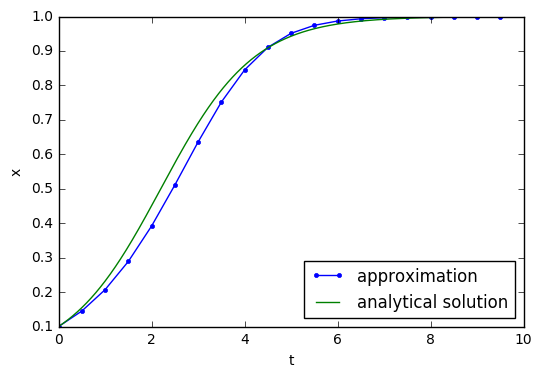

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import 

# time intervals
tt = arange(0, 10, 0.5)
# initial condition
xx = [0.1]

def f(x):
    return x * (1.-x)

# loop over time
for t in tt[1:]:
    xx.append(xx[-1] + 0.5 * f(xx[-1]))

# plotting
plot(tt, xx, '.-')
ta = arange(0, 10, 0.01)
plot(ta, 0.1 * exp(ta)/(1+0.1*(exp(ta)-1.)))
xlabel('t')
ylabel('x')
legend(['approximation', 'analytical solution'], loc='best',)

## Why use scientific libraries?

The method we just used above is called the *Euler method*, and is the simplest one available. The problem is that, although it works reasonably well for the differential equation above, in many cases it doesn't perform very well. There are many ways to improve it: in fact, there are many books entirely dedicated to this. Although many math or physics students do learn how to implement more sophisticated methods, the topic is really deep. Luckily, we can rely on the expertise of lots of people to come up with good algorithms that work well in most situations.

## Then, how... ?

We are going to demonstrate how to use scientific libraries to integrate differential equations. Although the specific commands depend on the software, the general procedure is usually the same:

* define the derivative function (the right hand side of the differential equation)
* choose a time step or a sequence of times where you want the solution
* provide the parameters and the initial condition
* pass the function, time sequence, parameters and initial conditions to a computer routine that runs the integration.

### A single equation

So, let's start with the same equation as above, the logistic equation, now with any parameters for growth rate and carrying capacity:

$$ \frac{dx}{dt} = f(x) = r x \left(1 - \frac{x}{K} \right) $$

with $r=2$, $K=10$ and $x(0) = 0.1$. We show how to integrate it using python below, introducing key language syntax as necessary.

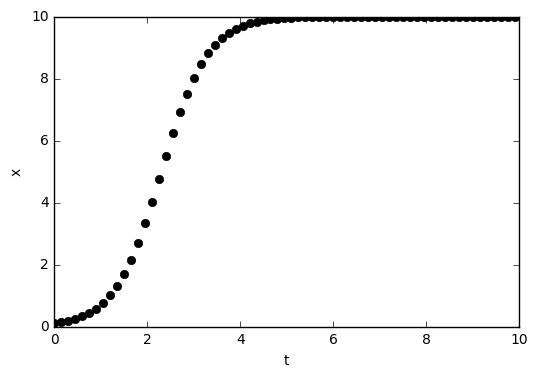

In [44]:
from numpy import *
from matplotlib.pyplot import *

# import the numerical integrator we will use, odeint()
from scipy.integrate import odeint

t = arange(0, 10., step=0.01)
# parameters
r = 2.
K = 10.
# initial condition
x0 = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (x) and of the 
# time (t), even if time does not appear explicitly
def f(x, t, r, K):
    return r*x*(1-x/K)

# call the function that performs the integration
# the order of the arguments is as below: the derivative function,
# the initial condition, the points where we want the solution, and
# a list of parameters
x = odeint(f, x0, t, (r, K))

# plot the solution
plot(t, x, 'ko', markevery=15)
xlabel('t') # define label of x-axis
ylabel('x') # and of y-axis

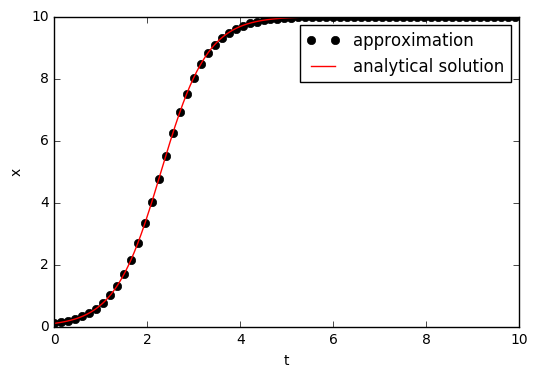

In [45]:
# plot the solution
plot(t, x, 'ko', markevery=15)
xlabel('t') # define label of x-axis
ylabel('x') # and of y-axis

# plot analytical solution on top
# notice that `t` is an array: when you do any arithmetical operation
# with an array, it is the same as doing it for each element
plot(t, K * x0 * exp(r*t)/(K+x0*(exp(r*t)-1.)), 'r-')
legend(['approximation', 'analytical solution'], loc='best') # draw legend

We get a much better approximation now, the two curves superimpose each other!

Now, what if we wanted to integrate a system of differential equations? Let's take the Lotka-Volterra equations:

$$ \begin{aligned}
\frac{dV}{dt} &= r V - c V P\\
\frac{dP}{dt} &= ec V P - dP
\end{aligned}$$

In this case, the variable is no longer a number, but an array `[V, P]`. We do the same as before, but now `x` is going to be an array:

('shape of x:', (5000, 2))


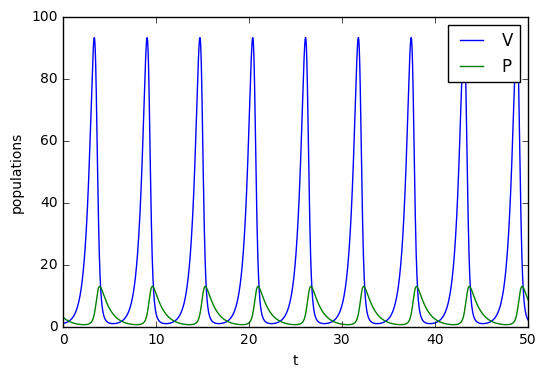

In [46]:
# we didn't need to do this again: if the cell above was run already,
# the libraries are imported, but we repeat it here for convenience
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import odeint

t = arange(0, 50., 0.01)

# parameters
r = 2.
c = 0.5
e = 0.1
d = 1.

# initial condition: this is an array now!
x0 = array([1., 3.])

# the function still receives only `x`, but it will be an array, not a number
def LV(x, t, r, c, e, d):
    # in python, arrays are numbered from 0, so the first element 
    # is x[0], the second is x[1]. The square brackets `[ ]` define a
    # list, that is converted to an array using the function `array()`.
    # Notice that the first entry corresponds to dV/dt and the second to dP/dt
    return array([ r*x[0] - c * x[0] * x[1],
                   e * c * x[0] * x[1] - d * x[1] ])

# call the function that performs the integration
# the order of the arguments is as below: the derivative function,
# the initial condition, the points where we want the solution, and
# a list of parameters
x = odeint(LV, x0, t, (r, c, e, d))

# Now `x` is a 2-dimension array of size 5000 x 2 (5000 time steps by 2
# variables). We can check it like this:
print('shape of x:', x.shape)

# plot the solution
plot(t, x)
xlabel('t') # define label of x-axis
ylabel('populations') # and of y-axis
legend(['V', 'P'], loc='upper right')

An interesting thing to do here is take a look at the *phase space*, that is, plot only the dependent variables, without respect to time:

('Initial condition:', array([ 1.,  3.]))


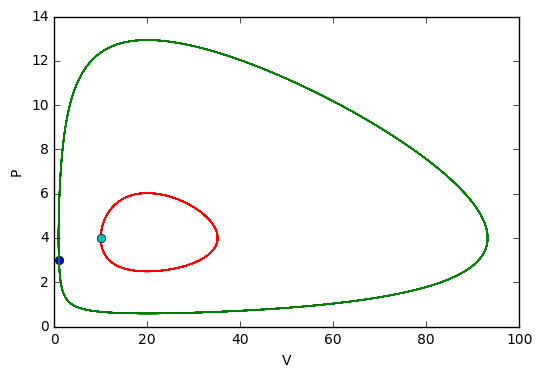

In [47]:
# `x[0,0]` is the first value (1st line, 1st column), `x[0,1]` is the value of 
# the 1st line, 2nd column, which corresponds to the value of P at the initial
# time. We plot just this point first to know where we started:
plot(x[0,0], x[0,1], 'o')
print('Initial condition:', x[0])

# `x[0]` or (equivalently) x[0,:] is the first line, and `x[:,0]` is the first
# column. Notice the colon `:` stands for all the values of that axis. We are
# going to plot the second column (P) against the first (V):
plot(x[:,0], x[:,1])
xlabel('V')
ylabel('P')

# Let's calculate and plot another solution with a different initial condition
x2 = odeint(LV, [10., 4.], t, (r, c, e, d))
plot(x2[:,0], x2[:,1])
plot(x2[0,0], x2[0,1], 'o')

**Congratulations**: you are now ready to integrate any system of differential equations! (We hope generalizing the above to more than 2 equations won't be very challenging).

### For more info:

* [Python tutorial](http://docs.python.org/3/tutorial/index.html) (chapters 3 to 5 are specially useful).
* [An introduction to Numpy](http://nbviewer.ipython.org/github/iguananaut/notebooks/blob/master/numpy.ipynb)
* [Another one](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb), covering a little bit more ground.
* [The matplotlib gallery](http://matplotlib.org/gallery.html): all kinds of plots, with sample code to use.